# Classification ML for AXA Mansard Medical Insurance 

1. <b>Problem Statement<b> <br>

Due to low sales on specific insurance products. The company wants to know whether someone who walks in will buy the insurance or not. 

<b> Models to be used </b>
* Logistic Regression
* Random Forest
* XGBoost
* Support Vector Machine (SVM)
* Naive Bayes

In [103]:
#importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings #to ingnore warnings
warnings.filterwarnings('ignore')

In [104]:
#Load the dataset
insurance = pd.read_csv('Medical_insurance_dataset.csv')


insurance.head(), insurance.shape

(    User ID  Gender  Age  EstimatedSalary      Purchased
 0  15624510    Male   19            19000  not-purchased
 1  15810944    Male   35            20000  not-purchased
 2  15668575  Female   26            43000  not-purchased
 3  15603246  Female   27            57000  not-purchased
 4  15804002    Male   19            76000  not-purchased, (400, 5))

In [105]:
#view columns of the dataset
insurance.columns, len(insurance.columns)

(Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object'),
 5)

In [106]:
#view the data types
insurance.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased          object
dtype: object

In [107]:
#print shapes
f'insurance shape {insurance.shape}'

'insurance shape (400, 5)'

In [108]:
#copy the original datatset
insurance_copy = insurance.copy()

#drop the User_ID column
insurance.drop('User ID', axis = 'columns', inplace = True)

# EXPLORATORY DATA ANALYSIS EDA

# Univariable Analysis

**Target Variable**<br>

* Purchased

In [109]:
#frequency distribution 
print(f'Frequency:\n {insurance.Purchased.value_counts()}')
print(f'\nProportions:\n{insurance.Purchased.value_counts(normalize = True)}')

Frequency:
 not-purchased    257
purchased        143
Name: Purchased, dtype: int64

Proportions:
not-purchased    0.6425
purchased        0.3575
Name: Purchased, dtype: float64


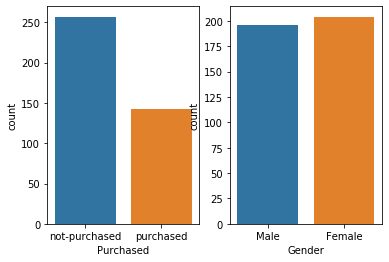

In [110]:
plt.figure(1)
plt.subplot(121)
sns.countplot(x = 'Purchased', data = insurance)

plt.subplot(122)
sns.countplot(x = 'Gender', data = insurance);
plt.show()

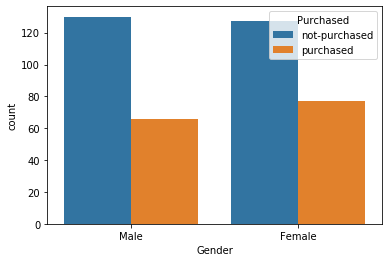

In [111]:
sns.countplot(x = 'Gender', hue = 'Purchased', data = insurance);

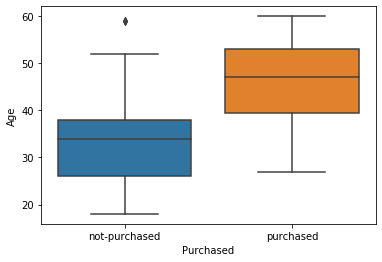

In [112]:
sns.boxplot(x = 'Purchased', y = 'Age', data = insurance);

The age group that is less likely to purchase the insurance is aged between 25 to 38 years and those who normally purchase the insurance are aged 40 to 55years old

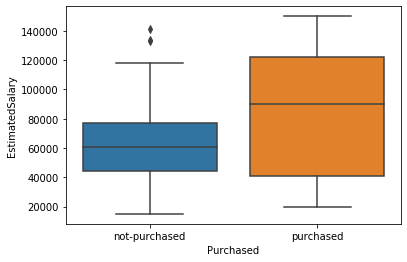

In [113]:
sns.boxplot(x = 'Purchased', y = 'EstimatedSalary', data = insurance);

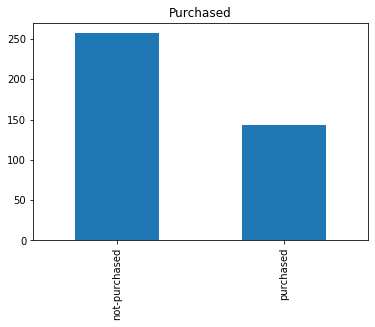

In [114]:
#bar plot
insurance.Purchased.value_counts().plot.bar(title = 'Purchased');

In [115]:
insurance.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

<b> Independent Variables </b><br>
* Categorical Features: Gender
* Ordinal Feature: Age
* Numerical Feature: EstimatedSalary

1. <b>Independent Categorical Variables

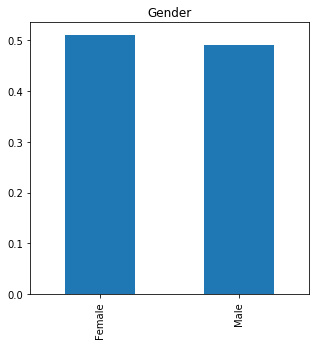

In [116]:
#visualizing categorical variables
plt.figure(1)
insurance.Gender.value_counts(normalize = True).plot.bar(figsize = (5, 5), title = "Gender") #plots Gender

plt.show()

2. <b>Independent Numerical Variables</b><br>

    * EstimatedSalary
    * Age


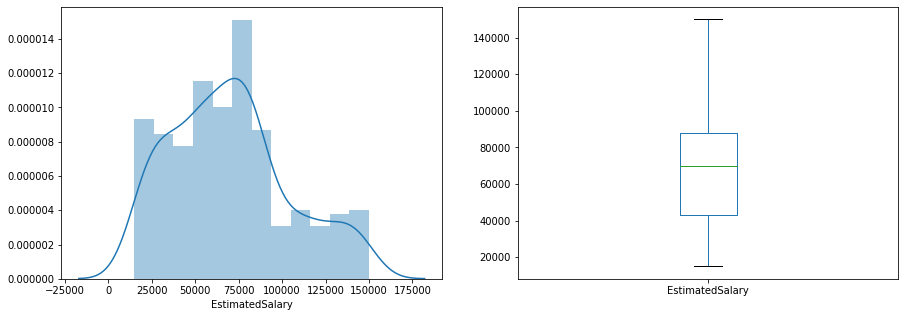

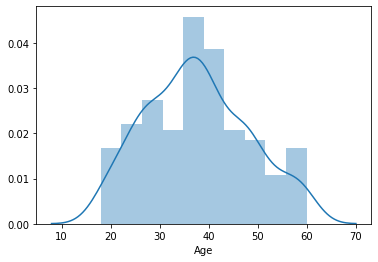

In [117]:
#visualizing 
plt.figure(1)

plt.subplot(121)
sns.distplot(insurance.EstimatedSalary); #density distribution

plt.subplot(122)
insurance.EstimatedSalary.plot.box(figsize = (15, 5)) #boxplot

plt.show()

plt.figure(2)

sns.distplot(insurance.Age);
plt.show()

The data is fairly distriuted without any outliers or extreme values

# Bivariable Analysis

* Analysis will based on independent variables and target variable

<b>Purchased vs Gender </b>

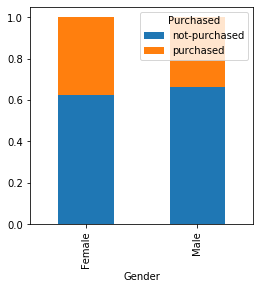

In [118]:
Gender = pd.crosstab(insurance['Gender'], insurance['Purchased'])

Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar',  stacked = True, figsize = (4, 4));

**Numerical Independent Variables vs Dependent Variable** <br>

* EstimatedSalary vs Purchased
* Age vs Purchased

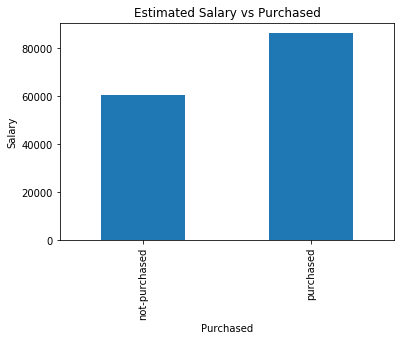

In [119]:
#Estimated Salary visualization
insurance.groupby('Purchased').EstimatedSalary.mean().plot.bar(title = 'Estimated Salary vs Purchased')
plt.ylabel('Salary');

We can somehowe make inferences that people who earn more tend to buy the insurance than the low income earners.

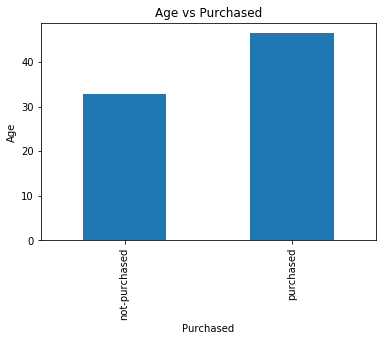

In [120]:
#Age vs Purchased
insurance.groupby('Purchased').Age.mean().plot.bar(title = 'Age vs Purchased')
plt.ylabel('Age');

We can make the inference that people who are in their 40s purchase more insurance than younger ones

<b> Transoform the label Purchased </b><br>

* purchased : 1
* not-purchased: 0

In [121]:
insurance['Purchased'] = insurance['Purchased'].apply(lambda x: 1 if x == 'purchased' else 0)

In [122]:
insurance.head(2)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0


# Building the Models

<b>Data Preprocessing </b>

* Seperating features and the label from the data 

In [123]:
#importing the modules
from sklearn import metrics #to be used for evaluation
from sklearn.model_selection import train_test_split

In [124]:
#splits data into features and target
X = insurance.drop(['Purchased'], axis = 'columns') #dropping the label variable (purchased) from the data to create features
y = insurance['Purchased'] #creates target variable

In [125]:
X.head(2)

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000


In [126]:
y.head(2)

0    0
1    0
Name: Purchased, dtype: int64

**One-Hot Encodng**<br>

create dummies by applying one hot encoding for all the categorical features in the data

In [127]:
#get dummies for gender
pd.get_dummies(insurance.Gender)

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [128]:
#get dummies in the feature column
X = pd.get_dummies(X)

In [129]:
X.head(3)

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0


In [130]:
#splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

# 1. Logistic Regression Model

In [131]:
#importing and fitting the logistic regression model
from sklearn.linear_model import LogisticRegression

#create object of class LogisticRegression()
logisticmodel = LogisticRegression()

#fit the model to the training data
logisticmodel.fit(x_train, y_train);

In [132]:
#predict the X_test
logisticmodel.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [133]:
#save the prediction results
logistic_prediction = logisticmodel.predict(x_test)

<b>Model Evaluation

In [144]:
#Confusion Matrix
def ConfusionMatrix(ytest, ypred, label = ['Negative', 'Positive']):
    "Confusion Matrix function to check the model Performance"
    
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize = (7,5))
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'YlGn' )
    plt.xlabel('Predicted', fontsize = 13)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.ylabel('Truth', fontsize = 13)
    plt.title('A confusion matrix');

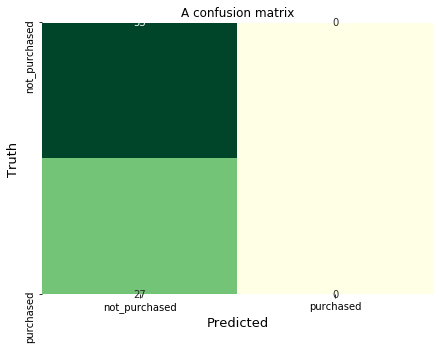

In [145]:
#using the ConfusionMatrix()
ConfusionMatrix(y_test, logistic_prediction, label = ['not_purchased', 'purchased'])

<b>Interpertation of the model evaluation Performance</b><br>
* There are 53 True Negative (TN): predicting that the will not buy the insurance and truly the customer did not buy the insurance
* There are 27 Flase Negative (FN): predicting that the customer will not buy the insurance and the customer actually bought the insurance

Therefore the model is just assuming that everyone is not gonna buy the insurance due to the inbalanced datasets. There is more of unpuchased due than the purchased

<b> Checking the Accuracy <b>

In [148]:
metrics.accuracy_score(y_test, logistic_prediction)

0.6625

The models accuracy is 66.2%. We cannot trust this accuracy since the data is class imbalanced. Therefore we are going to use the F1 score instead

In [149]:
#using the f1 score
metrics.f1_score(y_test, logistic_prediction)

0.0

# 2. Naive Bayes Model

In [152]:
#import the GaussionNB
from sklearn.naive_bayes import GaussianNB

naivemodel = GaussianNB()

#fit the model
naivemodel.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [154]:
#assign the model to naivemodel_pred
naivemodel_pred = naivemodel.predict(x_test)

In [155]:
#call the model to see prediction
naivemodel_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

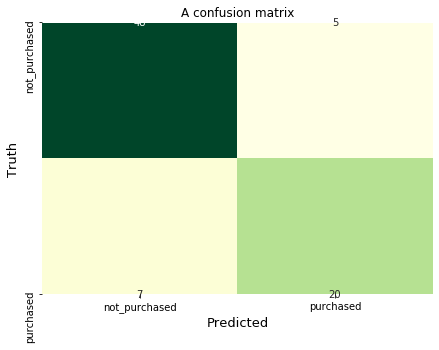

In [157]:
#check the confusionmetrix
ConfusionMatrix(y_test, naivemodel_pred, label = ['not_purchased', 'purchased'])

<b>Interpretation of Naive Model Evaluation Performance </b><br> 

* There are 48 True Negatives (TN): Prediction that the customers willnot buy the insurance truy they did not buy it
* There are 20 True Positives (TP): Predicting that the customers will buy the insruance and truy they bought it
* There are 7 False Negatives (FN): Predicting that the customer will not buy the insurance and the customer bought the insurance
* There are 5 False Positive (FP): Predicting that the customer will buy the insurance and the customer did not buy the insurance

Therefor it means the Naive Model works better even when the data is not balanced unlike the LogisticRegression

In [158]:
#Accuracy of the naivemodel
metrics.accuracy_score(y_test, naivemodel_pred)

0.85

The model achieved 85% accuracy

In [159]:
#Checking the F1 score
metrics.f1_score(y_test, naivemodel_pred)

0.7692307692307692

The model achieved the f1 score of 76.92 %

# 3. Random Forest Model

In [160]:
#import the model
from sklearn.ensemble import RandomForestClassifier

#create a randomeforestmodel of class RandomForestClassifier
randomforestmodel = RandomForestClassifier()

#fit the model to the data
randomforestmodel.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [163]:
#assignment of the model
randomforestmodel_pred = randomforestmodel.predict(x_test)

In [164]:
#print the predictions
randomforestmodel_pred 

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

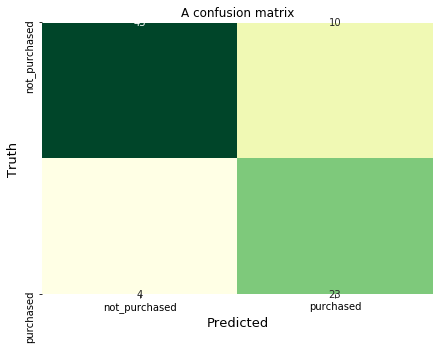

In [165]:
#check the confusionmetrix
ConfusionMatrix(y_test,  randomforestmodel_pred, label = ['not_purchased', 'purchased'])

In [166]:
#Accuracy of the naivemodel
metrics.accuracy_score(y_test, randomforestmodel_pred)

0.825

The accuracy of the Random Forest Model is 82.5%. Meaning it can also handle the inbalanced data better

In [168]:
#Checking the F1 score
metrics.f1_score(y_test,  randomforestmodel_pred)

0.7666666666666667

# 4. XGBoost Model

In [195]:
#import the xgboostclassifier 
from xgboost import XGBClassifier

#create an object
xgboostmodel = XGBClassifier(use_label_encoder = False)

xgboostmodel.fit(x_train, y_train); #fit the model

[20:37:49] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [196]:
#predict the test dataset
xgboostmodel_pred = xgboostmodel.predict(x_test)

In [197]:
#print the output
xgboostmodel_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

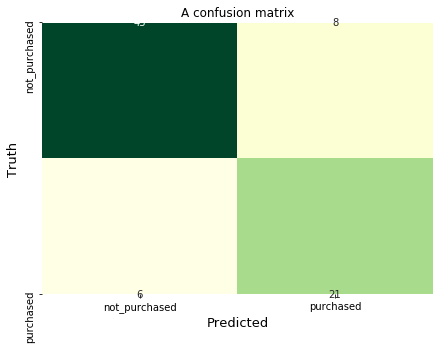

In [198]:
#check the confusionmetrix
ConfusionMatrix(y_test,  xgboostmodel_pred, label = ['not_purchased', 'purchased'])

**Evaluation Metrics**

In [199]:
#print the accuracy
metrics.accuracy_score(y_test, xgboostmodel_pred)

0.825

The model achieved 82.5% accuracy

In [200]:
#f1 score
metrics.f1_score(y_test, xgboostmodel_pred)

0.75

The model achieved an f1 score of 0.75

# 5. Support Vector Machine (SVM)

In [201]:
#import the svc
from sklearn.svm import SVC

svcmodel = SVC() #creating a svcmodel object of class svc

svcmodel.fit(x_train, y_train) #train the model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [202]:
#assign svcmodel_pred to prediction
svcmodel_pred = svcmodel.predict(x_test)

svcmodel_pred #print the outcomes

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

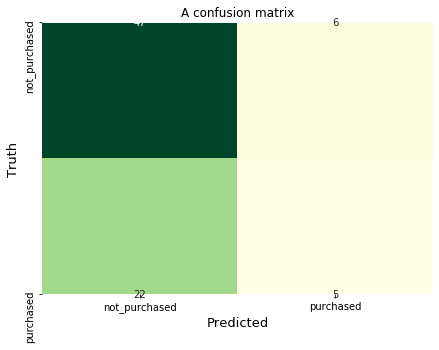

In [203]:
#check the confusionmetrix
ConfusionMatrix(y_test,  svcmodel_pred, label = ['not_purchased', 'purchased'])

In [204]:
#print the accuracy
metrics.accuracy_score(y_test, svcmodel_pred)

0.65

In [205]:
#print score
metrics.f1_score(y_test, svcmodel_pred)

0.2631578947368421

The model performed very bad with the accuracy of 0.65 and the f1 score of 0.26